In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('PrePlacement.csv')

In [3]:
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [6]:
import seaborn as sns
from matplotlib import pyplot
from scipy.stats import norm

In [5]:
import piplite
await piplite.install('seaborn')

<ipython-input-7-7e821320e6bb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['ssc_p'])


<AxesSubplot:xlabel='ssc_p', ylabel='Density'>

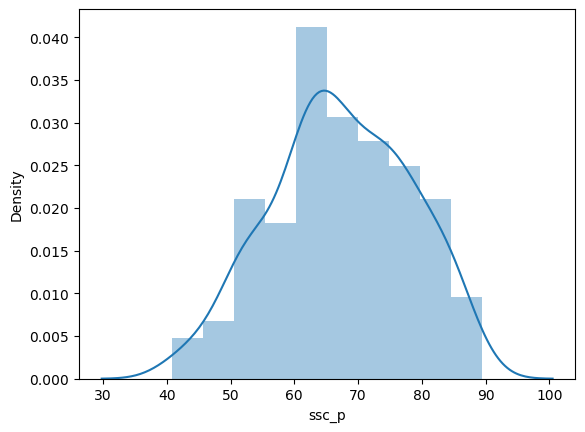

In [7]:
sns.distplot(dataset['ssc_p'])

In [8]:
def pdf_probability(dataset,startrange,endrange):
    #distplot function arguments- 
    #dataset is given
    #kernel density function to get curve, to be in blue color
    #histogram color in green color
    ax = sns.distplot(dataset,kde = True,kde_kws = {'color':'blue'},color='Green')
    # the axvline indicates vertical line , 
    #arguments - start range of the line, color in red
    pyplot.axvline(startrange,color = 'Red')
    # the axvline indicates vertical line , 
    #arguments - end range of the line, color in red
    pyplot.axvline(endrange,color = 'Red')

    sample = dataset
    #finding the mean using mean() function and stored in sample_mean variable
    sample_mean = sample.mean()
    #finding the standard deviation using std() function and stored in sample_std variable
    sample_std = sample.std()
    print('mean=%.3f, Standard Deviation = %.3f' % (sample_mean,sample_std))
    #creates the distribution , mean and std are passed in norm function
    dist = norm(sample_mean,sample_std)
    #range function takes start and end range
    #the values stored in value list
    values = [value for value in range(startrange,endrange)]
    #value list is passed in dist.pdf function
    probabilities = [dist.pdf(value) for value in values]
    #finding the summation
    prob = sum(probabilities)
    print('Area between range({},{}) :{}'.format(startrange,endrange,sum(probabilities)))
    return prob
    

<ipython-input-8-837e1f977046>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde = True,kde_kws = {'color':'blue'},color='Green')


mean=67.303, Standard Deviation = 10.827
Area between range(60,70) :0.3449514151280293


0.3449514151280293

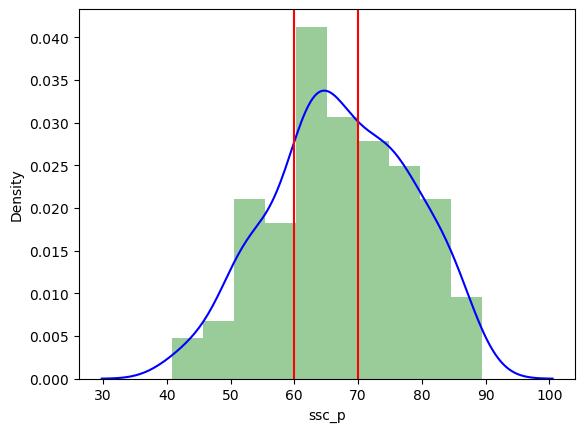

In [9]:
pdf_probability(dataset['ssc_p'],60,70)

In [16]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(78)

0.827906976744186

In [12]:
import piplite
await piplite.install('statsmodels')

In [20]:
#convert to normal standard distribution
def stdNB(dataset):
    #mean function is used to find the mean and stored in mean variable
    mean = dataset.mean()
    #std function is used to find the standard deviation and stored in std variable
    std = dataset.std()
    #passing the values of the dataset and storing in list
    values = [i for i in dataset]
    #z_score calculation using mean and std
    z_score = [((j - mean)/std) for j in values]
    #plotting the standard normal distribution curve
    sns.displot(z_score,kde = True) 
    sum(z_score)/len(z_score)

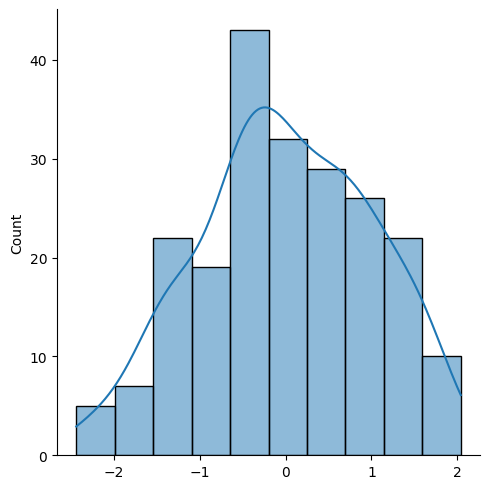

In [21]:
stdNB(dataset['ssc_p'])